In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 불러오기
with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)
with open("y_train.pkl", "rb") as f:
    y_train = pickle.load(f)
with open("X_test.pkl", "rb") as f:
    X_test = pickle.load(f)
with open("y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

# 모델 정의 및 하이퍼파라미터 튜닝
rf = RandomForestRegressor(random_state=42)
params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}
grid = GridSearchCV(rf, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

# 최적 모델 저장
best_rf = grid.best_estimator_
with open("rf_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

# 예측 및 평가
y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Params:", grid.best_params_)
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

# 결과 저장
pd.DataFrame({
    "actual": y_test,
    "predicted": y_pred
}).to_csv("predictions_rf.csv", index=False)


Best Params: {'max_depth': None, 'n_estimators': 100}
RMSE: 2.81
R^2: 0.89


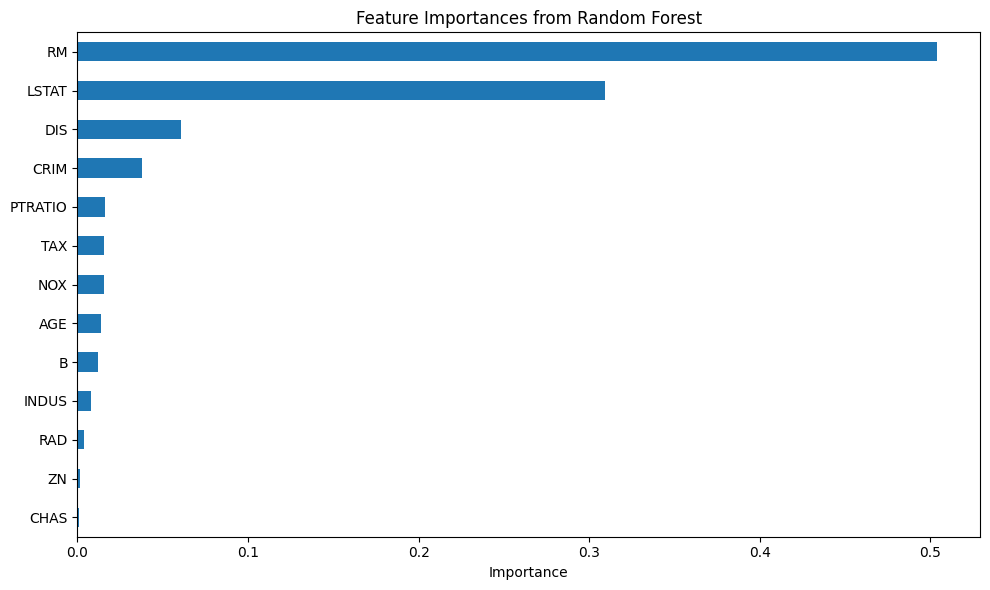

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# 모델과 학습 데이터 불러오기
with open("rf_model.pkl", "rb") as f:
    best_rf = pickle.load(f)
with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)

# 중요도 추출 및 시각화
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


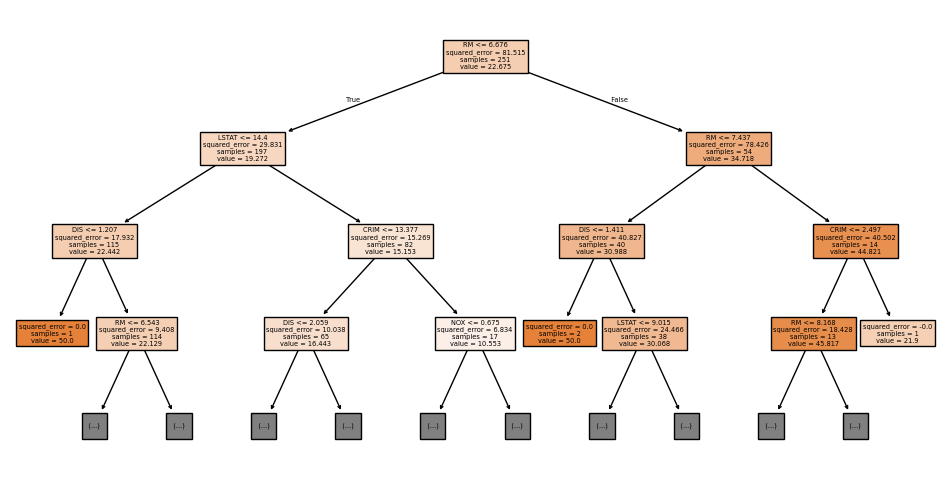

In [3]:
from sklearn.tree import plot_tree
tree = best_rf.estimators_[0]

plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=X_train.columns, filled=True, max_depth=3)
plt.show()
